<a href="https://colab.research.google.com/github/HamiltonLROliveira/ciencia_dados_puc_rj/blob/main/anal_expl_viagens_gov_federal_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas
Hamilton Luiz Rodrigues de Oliveira

#1. Definição do Problema

O Dataset utilizado neste projeto é o registro das despesas com transporte em viagens a serviço do Governo Federal durante o ano de 2023, disponível no Portal da Transparência do Governo Federal em (https://portaldatransparencia.gov.br/download-de-dados).
O dataset é composto de quatro tabelas que são Pagamento, Passagem, Trecho e Viagem. Foram utilizadas efetivamente as tabelas Pagamento e Passagem cujas colunas serão descritas a seguir.

Informações sobre os atributos da tabela Passagem:

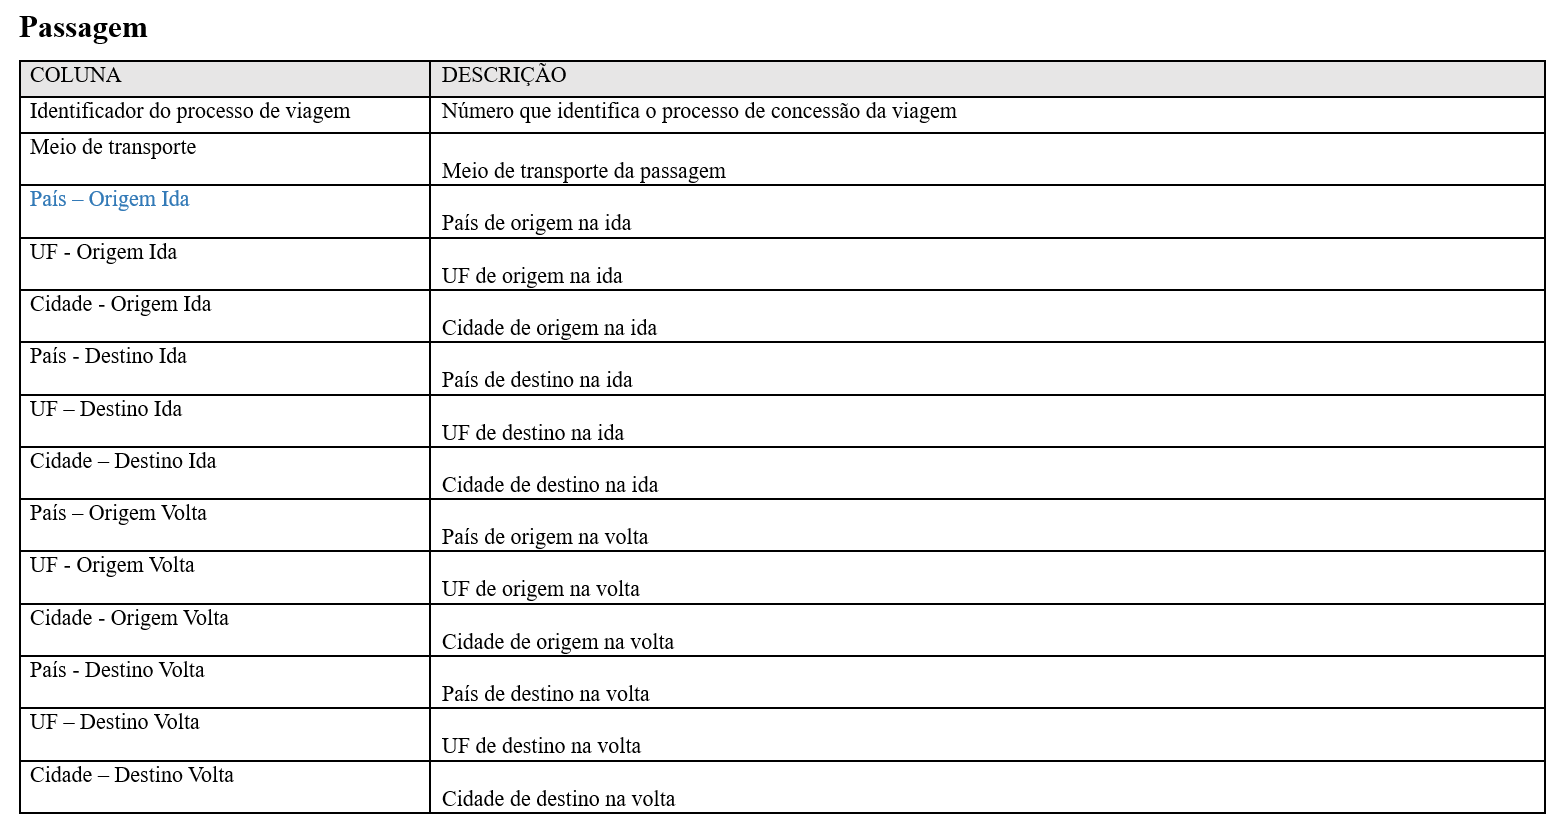

Informações sobre a tabela Pagamento:

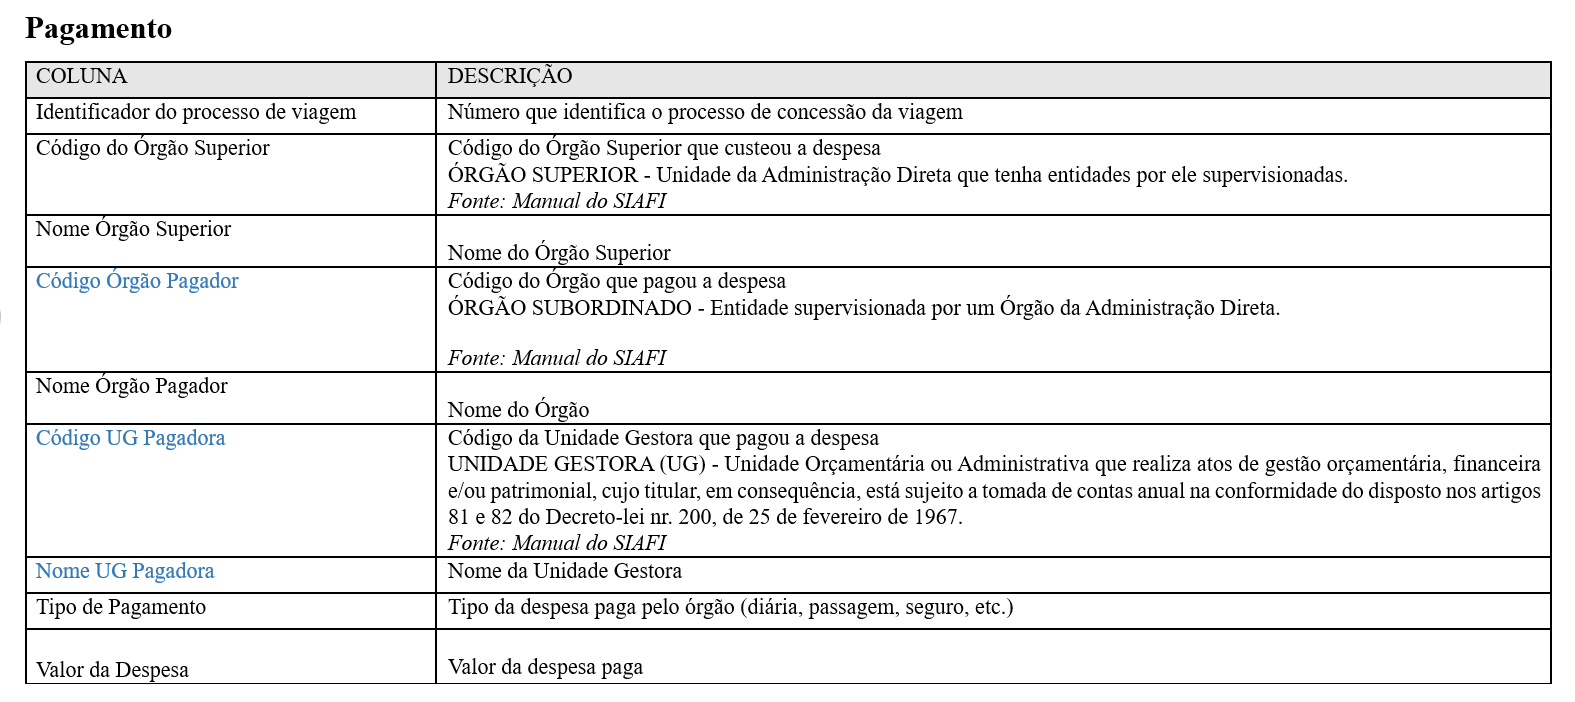

In [44]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from datetime import datetime

# 2. Carga dos Dados
Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv com cabeçalho na primeira linha dos arquivos.

Com o dataset carregado, iremos explorá-lo um pouco.

In [45]:
# Carrega arquivo Passagem em csv e zipado usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/HamiltonLROliveira/ciencia_dados_puc_rj/main/2023_Passagem.zip"

# Lê o arquivo utilizando as colunas informadas
df_passagens = pd.read_csv(url, sep=';', encoding='latin1' )

In [46]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/HamiltonLROliveira/ciencia_dados_puc_rj/main/2023_Pagamento.zip"

# Lê o arquivo utilizando as colunas informadas
df_pgto = pd.read_csv(url, sep=';', encoding='latin1' )

In [47]:
df_passagens.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,NaN,Nova York,Brasil,Distrito Federal,Brasília,"7434,13","0,00",04/11/2022,11:04
1,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:39
2,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:42
3,18306785,000004/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:51
4,18306786,000003/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:48


In [48]:
df_pgto.shape

(967544, 10)

#3. Análise dos Dados


3.1. Estatísticas Descritivas\
Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas

In [49]:
# Mostra as dimensões dos datasets
df_passagens.shape

(288023, 19)

In [50]:
df_pgto.shape

(967544, 10)

In [51]:
# Mostra as informações do dataset
df_passagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288023 entries, 0 to 288022
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Identificador do processo de viagem  288023 non-null  int64 
 1   Número da Proposta (PCDP)            288023 non-null  object
 2   Meio de transporte                   288023 non-null  object
 3   País - Origem ida                    288023 non-null  object
 4   UF - Origem ida                      279085 non-null  object
 5   Cidade - Origem ida                  288023 non-null  object
 6   País - Destino ida                   288023 non-null  object
 7   UF - Destino ida                     276711 non-null  object
 8   Cidade - Destino ida                 288023 non-null  object
 9   País - Origem volta                  288023 non-null  object
 10  UF - Origem volta                    284917 non-null  object
 11  Cidade - Origem volta     

In [52]:
df_pgto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967544 entries, 0 to 967543
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Identificador do processo de viagem  967544 non-null  int64 
 1   Número da Proposta (PCDP)            967544 non-null  object
 2   Código do órgão superior             967544 non-null  int64 
 3   Nome do órgão superior               967544 non-null  object
 4   Codigo do órgão pagador              967544 non-null  int64 
 5   Nome do órgao pagador                967495 non-null  object
 6   Código da unidade gestora pagadora   967544 non-null  int64 
 7   Nome da unidade gestora pagadora     967544 non-null  object
 8   Tipo de pagamento                    967544 non-null  object
 9   Valor                                967544 non-null  object
dtypes: int64(4), object(6)
memory usage: 73.8+ MB


In [53]:
# Mostra as 10 primeiras linhas do dataset
df_passagens.head(10)

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,NaN,Nova York,Brasil,Distrito Federal,Brasília,"7434,13","0,00",04/11/2022,11:04
1,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:39
2,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:42
3,18306785,000004/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:51
4,18306786,000003/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:48
5,18320442,000002/23,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Rio Grande do Norte,Natal,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1518,18","0,00",06/12/2022,16:35
6,18320483,000003/23,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Rio Grande do Norte,Natal,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1369,29","0,00",06/12/2022,16:31
7,18320580,000004/23,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Rio Grande do Norte,Natal,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1369,29","0,00",06/12/2022,16:33
8,18345549,000001/23,Aéreo,Portugal,NaN,Lisboa,Brasil,Tocantins,Palmas,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"4336,39","0,00",23/11/2022,15:41
9,18345549,000001/23,Aéreo,Brasil,Tocantins,Palmas,Portugal,NaN,Lisboa,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"4336,39","0,00",23/11/2022,15:41


In [54]:
# Mostra as 10 últimas linhas do dataset
df_passagens.tail(10)

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
288013,2023001352,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,Minas Gerais,Belo Horizonte,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"943,41","0,00",NaN,00:00
288014,2023001355,Sem informaçã,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Bahia,Salvador,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"589,48","0,00",NaN,00:00
288015,2023001355,Sem informaçã,Aéreo,Brasil,Bahia,Salvador,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"589,28","0,00",NaN,00:00
288016,2023001379,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1748,41","0,00",NaN,00:00
288017,2023001379,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1762,72","0,00",NaN,00:00
288018,2023001394,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"2433,72","0,00",NaN,00:00
288019,2023001396,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1751,41","0,00",NaN,00:00
288020,2023001396,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"2095,92","0,00",NaN,00:00
288021,2023001415,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1575,11","0,00",NaN,00:00
288022,2023001415,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1589,42","0,00",NaN,00:00


In [55]:
# Mostra as 10 primeiras linhas do dataset
df_pgto.head(10)

,Identificador do processo de viagem,Número da Proposta (PCDP),Código do órgão superior,Nome do órgão superior,Codigo do órgão pagador,Nome do órgao pagador,Código da unidade gestora pagadora,Nome da unidade gestora pagadora,Tipo de pagamento,Valor
0,18288418,000007/23-1C,52000,Ministério da Defesa,52121,Comando do Exército,160069,CENTRO DE OBTENCOES DO EXERCITO,Serviço correlato: seguro,"1095,35"
1,18288418,000007/23-1C,52000,Ministério da Defesa,52121,Comando do Exército,160069,CENTRO DE OBTENCOES DO EXERCITO,PASSAGEM,"7434,13"
2,18288418,000007/23-1C,52000,Ministério da Defesa,52121,Comando do Exército,160069,CENTRO DE OBTENCOES DO EXERCITO,DIÁRIAS,"39565,70"
3,18296348,000070/23,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,158425,INST.FED. ESPIRITO SANTO/CAMPUS ALEGRE,DIÁRIAS,"1013,96"
4,18302983,000001/23,52000,Ministério da Defesa,52111,Comando da Aeronáutica,120006,GRUPAMENTO DE APOIO DE BRASILIA,PASSAGEM,"14903,10"
5,18303291,000002/23-2C,-11,Sigiloso,-11,Sigiloso,-11,Sigilosa,DIÁRIAS,"144,39"
6,18303291,000002/23-2C,-11,Sigiloso,-11,Sigiloso,-11,Sigilosa,DIÁRIAS,"4922,98"
7,18303291,000002/23-2C,-11,Sigiloso,-11,Sigiloso,-11,Sigilosa,PASSAGEM,"730,06"
8,18303291,000002/23-2C,-11,Sigiloso,-11,Sigiloso,-11,Sigilosa,PASSAGEM,"1823,56"
9,18303291,000002/23-2C,-11,Sigiloso,-11,Sigiloso,-11,Sigilosa,DIÁRIAS,"170,51"


In [56]:
# Mostra as 10 primeiras linhas do dataset
df_pgto.tail(10)

,Identificador do processo de viagem,Número da Proposta (PCDP),Código do órgão superior,Nome do órgão superior,Codigo do órgão pagador,Nome do órgao pagador,Código da unidade gestora pagadora,Nome da unidade gestora pagadora,Tipo de pagamento,Valor
967534,2023001355,Sem informaçã,-1,Sem informação,-3,NaN,-3,Inválido,DIÁRIAS,"606,89"
967535,2023001377,Sem informaçã,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,DIÁRIAS,"468,68"
967536,2023001379,Sem informaçã,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,PASSAGEM,"3511,13"
967537,2023001379,Sem informaçã,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,DIÁRIAS,"319,28"
967538,2023001394,Sem informaçã,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,PASSAGEM,"2433,72"
967539,2023001394,Sem informaçã,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,DIÁRIAS,"702,75"
967540,2023001396,Sem informaçã,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,PASSAGEM,"3847,33"
967541,2023001396,Sem informaçã,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,DIÁRIAS,"702,75"
967542,2023001415,Sem informaçã,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,DIÁRIAS,"281,84"
967543,2023001415,Sem informaçã,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,PASSAGEM,"3164,53"


In [57]:
# Verifica o tipo de dataset de cada atributo
df_passagens.dtypes

Identificador do processo de viagem     int64
Número da Proposta (PCDP)              object
Meio de transporte                     object
País - Origem ida                      object
UF - Origem ida                        object
Cidade - Origem ida                    object
País - Destino ida                     object
UF - Destino ida                       object
Cidade - Destino ida                   object
País - Origem volta                    object
UF - Origem volta                      object
Cidade - Origem volta                  object
Pais - Destino volta                   object
UF - Destino volta                     object
Cidade - Destino volta                 object
Valor da passagem                      object
Taxa de serviço                        object
Data da emissão/compra                 object
Hora da emissão/compra                 object
dtype: object

In [58]:
# Verifica o tipo de dataset de cada atributo
df_pgto.dtypes

Identificador do processo de viagem     int64
Número da Proposta (PCDP)              object
Código do órgão superior                int64
Nome do órgão superior                 object
Codigo do órgão pagador                 int64
Nome do órgao pagador                  object
Código da unidade gestora pagadora      int64
Nome da unidade gestora pagadora       object
Tipo de pagamento                      object
Valor                                  object
dtype: object

In [59]:
#Salvando o dataset original antes de realizar as modificacoes
df_passagens_1 = df_passagens.copy()

In [60]:
#Será necessário fazer a junção das tabelas Passagem e Pagamento, para que seja possível obter para cada trecho da viagem, os órgãos
#superiores e órgãos pagadores. A junção será feita por meio da coluna Identificador do processo de viagem existe em ambas as tabelas
df_pgto_1 = df_pgto[["Identificador do processo de viagem", 'Nome do órgão superior', 'Nome do órgao pagador']]
df_pgto_1 = df_pgto_1[~df_pgto.duplicated(subset=["Identificador do processo de viagem", 'Nome do órgão superior', 'Nome do órgao pagador'])].reset_index(drop=True)
df_passagens_1 = df_passagens_1.merge(df_pgto_1, how='left',  left_on='Identificador do processo de viagem', right_on='Identificador do processo de viagem')
df_passagens_1.shape

(312724, 21)

In [61]:
df_passagens_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312724 entries, 0 to 312723
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Identificador do processo de viagem  312724 non-null  int64 
 1   Número da Proposta (PCDP)            312724 non-null  object
 2   Meio de transporte                   312724 non-null  object
 3   País - Origem ida                    312724 non-null  object
 4   UF - Origem ida                      303511 non-null  object
 5   Cidade - Origem ida                  312724 non-null  object
 6   País - Destino ida                   312724 non-null  object
 7   UF - Destino ida                     301085 non-null  object
 8   Cidade - Destino ida                 312724 non-null  object
 9   País - Origem volta                  312724 non-null  object
 10  UF - Origem volta                    309563 non-null  object
 11  Cidade - Origem volta     

In [62]:
df_passagens_1.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,...,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,Nome do órgão superior,Nome do órgao pagador
0,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,...,Nova York,Brasil,Distrito Federal,Brasília,"7434,13","0,00",04/11/2022,11:04,Ministério da Defesa,Comando do Exército
1,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:39,Ministério da Defesa,Comando da Aeronáutica
2,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:42,Ministério da Defesa,Comando da Aeronáutica
3,18306785,000004/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:51,Ministério da Defesa,Comando da Aeronáutica
4,18306786,000003/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:48,Ministério da Defesa,Comando da Aeronáutica


In [63]:
# Para tornar possível apresentar um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis) serão necessárias
# algumas conversões de tipo das colunas. As colunas Valor da passagem e Taxa de serviço estao como string e devem ser convertidas para float
# Por outro lado, a coluna Identificador do processo de viagem que esta como int deve ser convertida para string

In [64]:
#Definicao da funcao de conversão das colunas Valor da passagem e Taxa de serviço  de string para float
def converter_numero(valor):
    try:
        return float(valor.replace('.', '').replace(',', '.'))
    except:
        return np.nan

In [65]:
#Chamada da funcao de conversão das colunas Valor da passagem e Taxa de serviço  de string para float
df_passagens_1['Valor da passagem'] = df_passagens_1['Valor da passagem'].apply(converter_numero)
df_passagens_1['Taxa de serviço'] =  df_passagens_1['Taxa de serviço'].apply(converter_numero)

In [66]:
#Conversao do cammpo Identificador do processo de viagem de int para string
df_passagens_1['Identificador do processo de viagem'] = df_passagens_1['Identificador do processo de viagem'].apply(lambda x: str(int(x)))

In [67]:
# Verifica o tipo de dataset de cada atributo apos as conversoes
df_passagens_1.dtypes

Identificador do processo de viagem     object
Número da Proposta (PCDP)               object
Meio de transporte                      object
País - Origem ida                       object
UF - Origem ida                         object
Cidade - Origem ida                     object
País - Destino ida                      object
UF - Destino ida                        object
Cidade - Destino ida                    object
País - Origem volta                     object
UF - Origem volta                       object
Cidade - Origem volta                   object
Pais - Destino volta                    object
UF - Destino volta                      object
Cidade - Destino volta                  object
Valor da passagem                      float64
Taxa de serviço                        float64
Data da emissão/compra                  object
Hora da emissão/compra                  object
Nome do órgão superior                  object
Nome do órgao pagador                   object
dtype: object

In [68]:
df_passagens_1.describe()

,Valor da passagem,Taxa de serviço
count,312724.000000,312724.000000
mean,1856.527098,9.059615
std,2236.957345,250.399433
min,0.000000,0.000000
25%,825.270000,0.000000
50%,1399.170000,0.000000
75%,2255.250000,0.000000
max,80337.200000,76896.940000


In [69]:
#É possivel ver a quantidade, media e mediana por trecho sendo que o trecho comm maior media eh o trecho Rio-Brasilia

colunas_gb = ['País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida']

colunas_selecao = ['País - Origem ida', 'UF - Origem ida',
                   'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida',
                   'Cidade - Destino ida', 'Valor da passagem']

df_passagens_1[colunas_selecao]\
    .groupby(colunas_gb, as_index=False)\
    .agg(['count', 'mean', 'median'])\
    .sort_values(('Valor da passagem', 'count'), ascending=False)\
    .head(10)

Valor da passagem  \
                                                                                                                              count   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida                     
Brasil            Rio de Janeiro    Rio de Janeiro      Brasil             Distrito Federal  Brasília                         15030   
                  Distrito Federal  Brasília            Brasil             Rio de Janeiro    Rio de Janeiro                   14224   
                                                                           São Paulo         São Paulo                        13027   
                  São Paulo         São Paulo           Brasil             Distrito Federal  Brasília                         13023   
                  Rio Grande do Sul Porto Alegre        Brasil             Distrito Federal  Brasília                          4285   
                  Distrito Federal  Brasília            Brasil             Rio Grande do Sul Porto Alegre                      4133   
                  Pernambuco        Recife              Brasil             Distrito Federal  Brasília                          3881   
                  Distrito Federal  Brasília            Brasil             Pernambuco        Recife                            3679   
                                                                           Bahia             Salvador                          3556   
                  Minas Gerais      Belo Horizonte      Brasil             Distrito Federal  Brasília                          3555   

                                                                                                                                \
                                                                                                                          mean   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida                
Brasil            Rio de Janeiro    Rio de Janeiro      Brasil             Distrito Federal  Brasília              1493.165988   
                  Distrito Federal  Brasília            Brasil             Rio de Janeiro    Rio de Janeiro        1445.730189   
                                                                           São Paulo         São Paulo             1512.584029   
                  São Paulo         São Paulo           Brasil             Distrito Federal  Brasília              1489.560723   
                  Rio Grande do Sul Porto Alegre        Brasil             Distrito Federal  Brasília              1715.985354   
                  Distrito Federal  Brasília            Brasil             Rio Grande do Sul Porto Alegre          1628.003612   
                  Pernambuco        Recife              Brasil             Distrito Federal  Brasília              1539.431430   
                  Distrito Federal  Brasília            Brasil             Pernambuco        Recife                1408.939388   
                                                                           Bahia             Salvador              1150.365394   
                  Minas Gerais      Belo Horizonte      Brasil             Distrito Federal  Brasília              1764.522788   

                                                                                                                             
                                                                                                                     median  
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida            
Brasil            Rio de Janeiro    Rio de Janeiro      Brasil             Distrito Federal  Brasília              1330.390  
                  Distrito Federal  Brasília            Brasil             Rio de Janeiro    Rio de Janeiro        1299.985  
                                     

In [70]:
#Existem varias modalidades de transporte nas viagens, sendo que neste projeto serao utilizados apenas as despesas de passagens aereas
df_passagens_1['Meio de transporte'].unique()

array(['Aéreo', 'Rodoviário', 'Fluvial'], dtype=object)

In [71]:
# Mantendo no dataset apenas passagens aereas
df_passagens_1 = df_passagens_1[(df_passagens_1['Meio de transporte'] == 'Aéreo')]

In [72]:
#Considerando que o trecho Rio-Brasilia apresenta a maior ocorrencia, o referido trecho serah utilizado ao longo do estudo
df_passagens_2 = df_passagens_1[(df_passagens_1['Cidade - Origem ida'] == 'Rio de Janeiro') & (df_passagens_1['Cidade - Destino ida'] == 'Brasília')]

In [73]:
#Iremos trabalhar apenas com valor da passagem, sendo assim removeremos a coluna taxa de serviço
df_passagens_2 = df_passagens_2.drop('Taxa de serviço', axis=1)

In [74]:
# Numero de viagens no trecho Rio-Brasilia
df_passagens_2.shape

(15030, 20)

In [75]:
# Estatisticas de valor de passagen do trecho Rio-Brasilia
df_passagens_2.describe()

,Valor da passagem
count,15030.000000
mean,1493.165988
std,903.031334
min,0.000000
25%,765.920000
50%,1330.390000
75%,2022.340000
max,7117.310000


# 3.2. Visualizações

In [76]:
# Lançaremos algum um olhar mais detalhado sobre os preços do trecho Rio-Brasilia pagos pelos órgãos superiores e órgãos pagadores

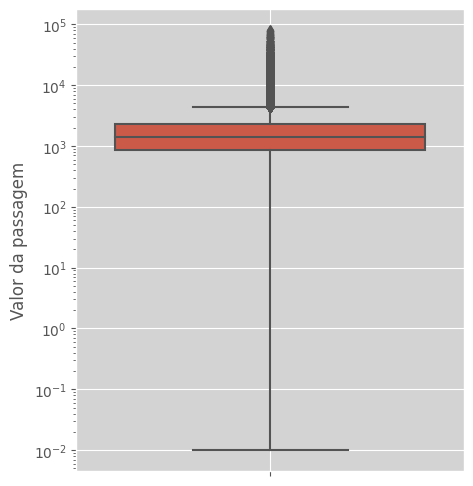

In [77]:
# A seguir um bloxspot considerando o valor da passagemm do trecho Rio-Brasilia
df_eixos = df_passagens_2.groupby(["Nome do órgão superior"]).size().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Qtde"]
df_eixos.insert(0, "órgão superior", orgaos)

df_passagens_g = df_passagens_1[df_passagens_1['Valor da passagem'] > 0.001]
plt.rcParams['figure.figsize'] = 5,6
ax = sns.boxplot(y=df_passagens_g['Valor da passagem'])
ax.set_yscale('log')
#ax.plot(x=[-1000, 1000], y=[2000,2000], color='red', linewidth=2, markersize=12)
plt.grid(True)
plt.show()

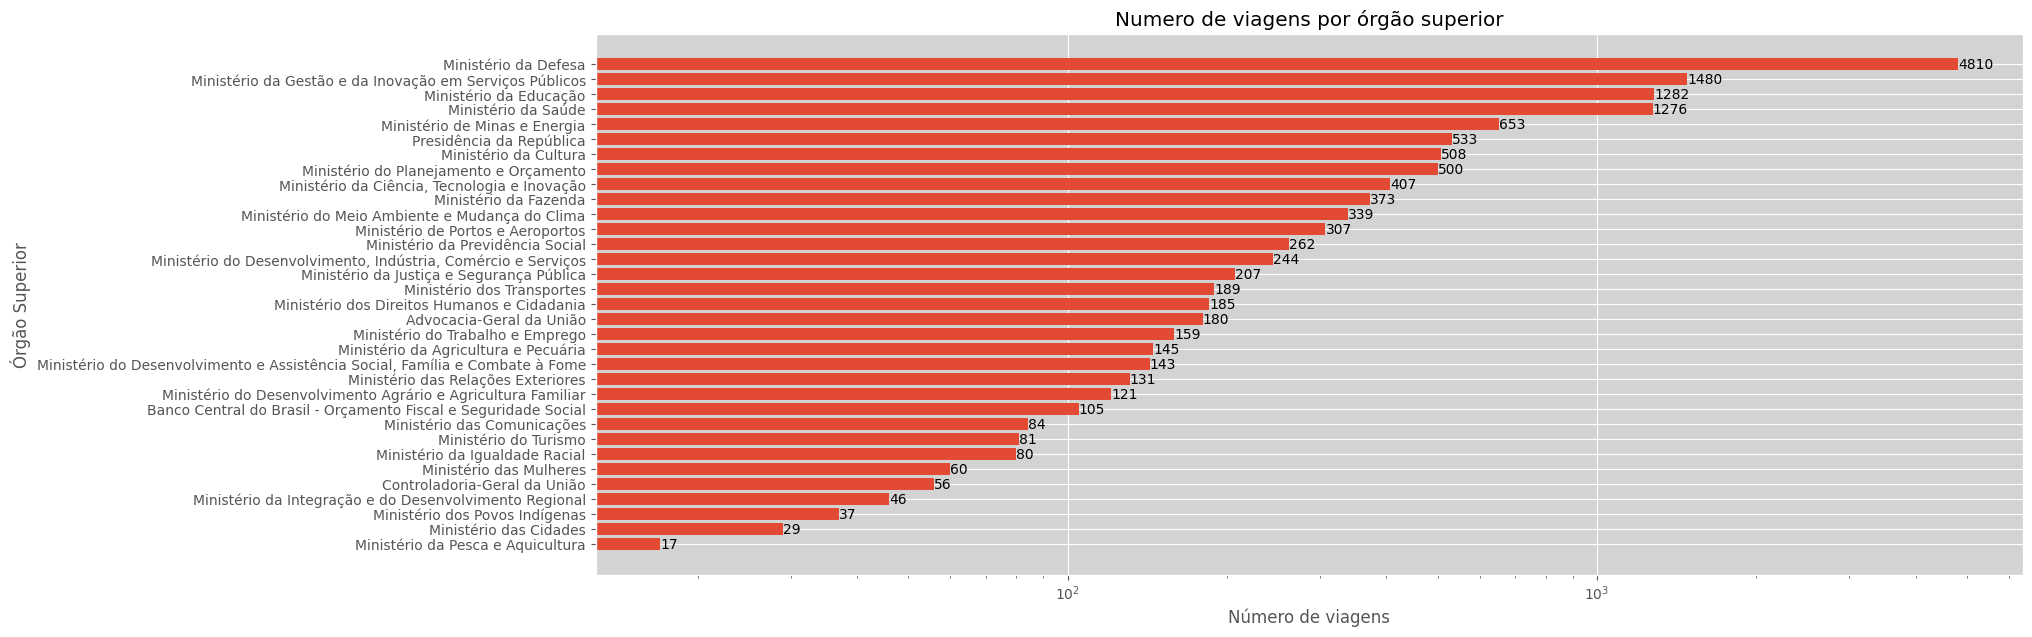

In [78]:
#A seguir um gráfico de barras apresentando a quantidade de viagens por órgãos superior, e ordem decrescente de quantidade
df_eixos = df_passagens_2.groupby(["Nome do órgão superior"]).size().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Qtde"]
df_eixos.insert(0, "órgão superior", orgaos)
#df_eixos

# criando o gráfico de barras
df_eixos_ordem_qtde = df_eixos.sort_values(["Qtde"] , ascending=True)
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgão superior"], df_eixos_ordem_qtde["Qtde"])
ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Numero de viagens por órgão superior")
plt.ylabel("Órgão Superior")
plt.xlabel("Número de viagens");
plt.show()

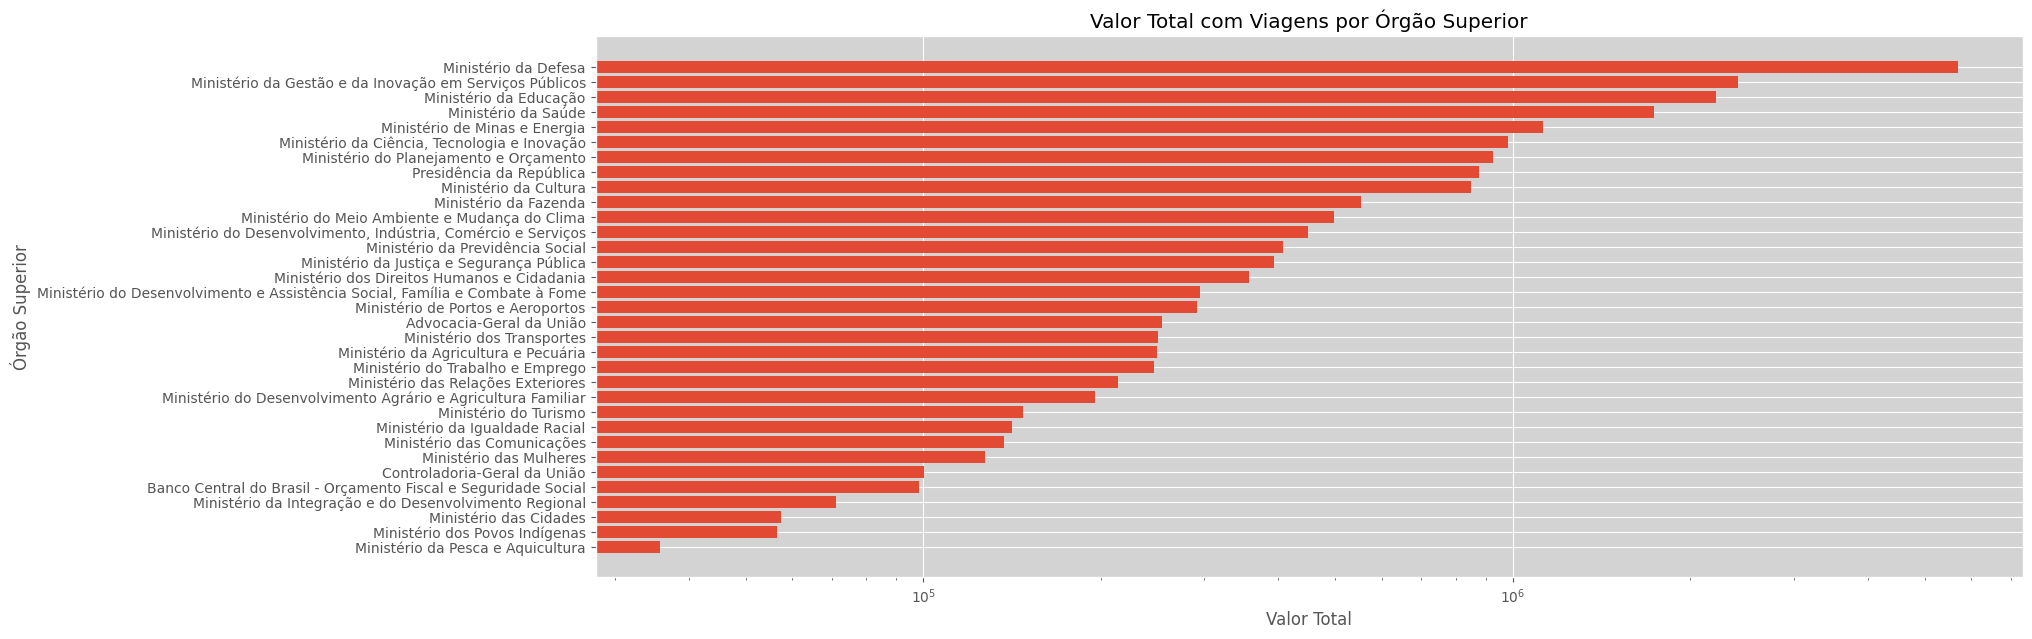

In [79]:
#A seguir um gráfico de barras apresentando o valor total gasto com viagens por órgãos superior, e ordem decrescente de valor
df_eixos = df_passagens_2.groupby(["Nome do órgão superior"])['Valor da passagem'].sum().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Valor Total"]
df_eixos.insert(0, "órgão superior", orgaos)
#df_eixos
# criando o gráfico de barras
df_eixos_ordem_qtde = df_eixos.sort_values(["Valor Total"] , ascending=True)
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgão superior"], df_eixos_ordem_qtde["Valor Total"])
#ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Valor Total com Viagens por Órgão Superior")
plt.ylabel("Órgão Superior")
plt.xlabel("Valor Total");
plt.show()


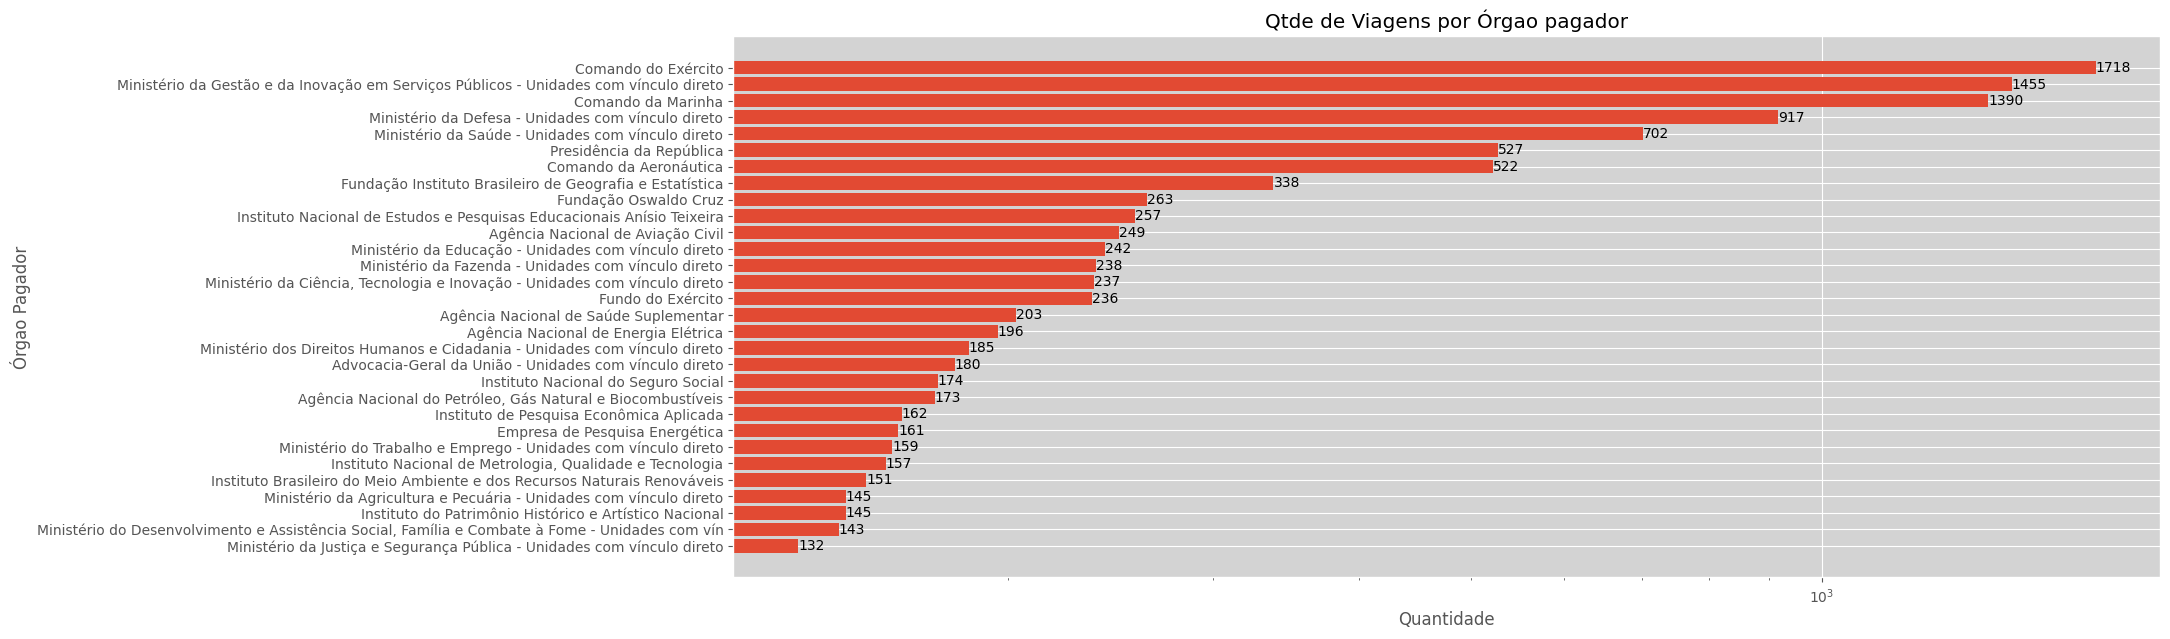

In [80]:
#A seguir um gráfico de barras apresentando a quantidade de viagens por órgãos pagador, e ordem decrescente de quantidade
df_eixos = df_passagens_2.groupby(["Nome do órgao pagador"]).size().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Qtde"]
df_eixos.insert(0, "órgao pagador", orgaos)
df_eixos_ordem_qtde = df_eixos.sort_values(["Qtde"] , ascending=False)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.head(30)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.sort_values(["Qtde"] , ascending=True)


# criando o gráfico de barras
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgao pagador"], df_eixos_ordem_qtde["Qtde"])
ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Qtde de Viagens por Órgao pagador")
plt.ylabel("Órgao Pagador")
plt.xlabel("Quantidade");
plt.show()

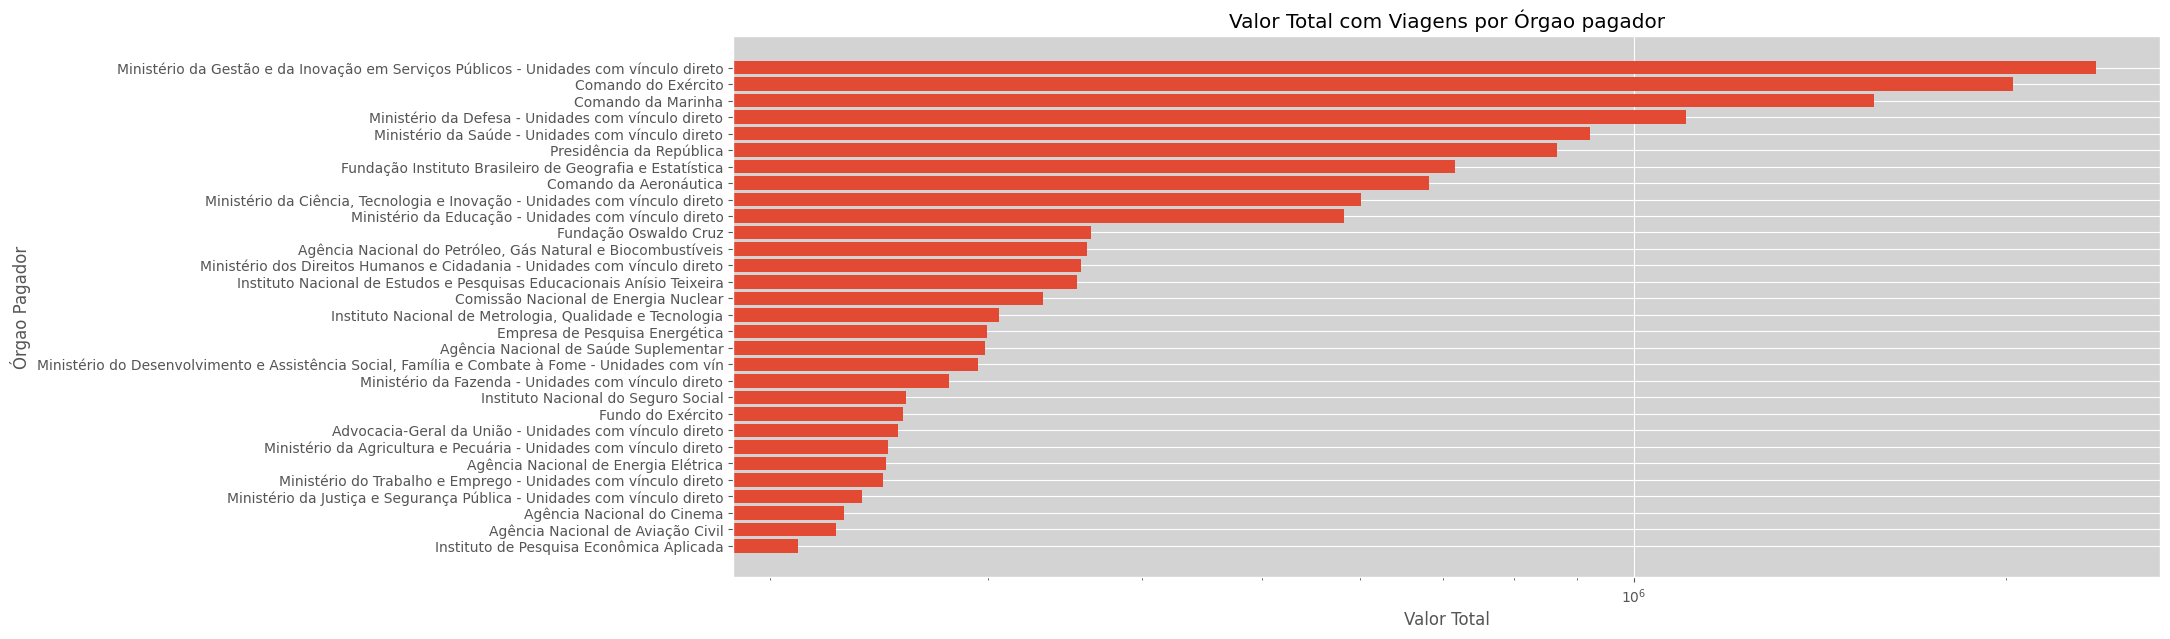

In [81]:
#A seguir um gráfico de barras apresentando o valor total gasto com viagens por órgãos superior, e ordem decrescente de valor
df_eixos = df_passagens_2.groupby(["Nome do órgao pagador"])['Valor da passagem'].sum().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Valor Total"]
df_eixos.insert(0, "órgao pagador", orgaos)
df_eixos_ordem_qtde = df_eixos.sort_values(["Valor Total"] , ascending=False)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.head(30)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.sort_values(["Valor Total"] , ascending=True)
#df_eixos
# criando o gráfico de barras
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgao pagador"], df_eixos_ordem_qtde["Valor Total"])
#ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Valor Total com Viagens por Órgao pagador")
plt.ylabel("Órgao Pagador")
plt.xlabel("Valor Total");
plt.show()


In [82]:
#Conforme apresentado anterior o valor médio da passagem do trecho Rio-Brasília é de 1493.165988. O objetivo é apresentar isolar
#os órgãos que estão acima/abaixo da valor médio, com a finalidade de identificar os que os dados informam sobre os órgãos que estão
#acima desse valor médio bem como identificar as semelhanças entre os órgãos que estão abaixo do valor médio e mais importante
#quais as diferenças entre os que estão acima e abaixo do valor médio da pasagem

In [83]:
df_orgao_superior = df_passagens_2.groupby(["Nome do órgão superior"])['Valor da passagem'].agg(['count', 'mean', 'median'])
orgaos = df_orgao_superior.index.to_list()
df_orgao_superior = df_orgao_superior.reset_index(drop=True)
df_orgao_superior.columns = ["Qtde", "Media", "Mediana"]
df_orgao_superior.insert(0, "Orgao Superior", orgaos)
df_orgao_superior = df_orgao_superior.sort_values(["Media"] , ascending=True)
df_orgao_superior

,Orgao Superior,Qtde,Media,Mediana
1,Banco Central do Brasil - Orçamento Fiscal e S...,105,938.682286,751.190
21,Ministério de Portos e Aeroportos,307,949.093322,824.790
6,Ministério da Defesa,4810,1183.599609,981.975
31,Ministério dos Transportes,189,1324.813545,1213.190
15,Ministério da Saúde,1276,1363.106121,1243.050
0,Advocacia-Geral da União,180,1409.583222,1340.630
25,Ministério do Meio Ambiente e Mudança do Clima,339,1468.724366,1289.980
8,Ministério da Fazenda,373,1485.184021,1208.190
30,Ministério dos Povos Indígenas,37,1527.899189,1332.700
11,Ministério da Integração e do Desenvolvimento ...,46,1545.907826,1668.880


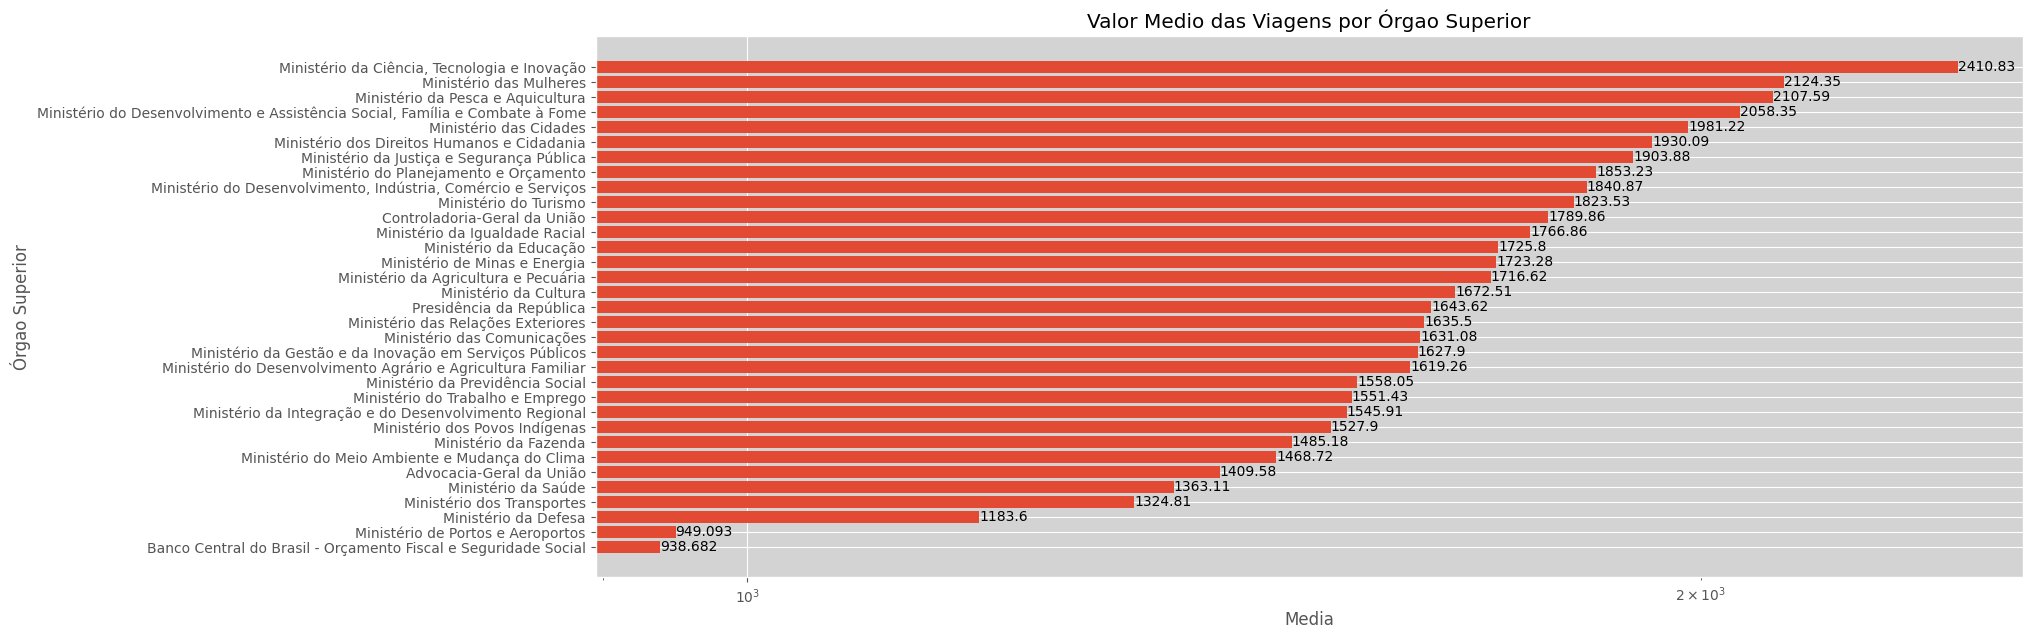

In [84]:
# criando o gráfico de barras considerando os valores médios das passagens por órgão superior
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_orgao_superior["Orgao Superior"], df_orgao_superior["Media"])
ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Valor Medio das Viagens por Órgao Superior")
plt.ylabel("Órgao Superior")
plt.xlabel("Media");
plt.show()

In [85]:
#Cria uma coluna Relacao_media identificando os órgãos cujos valores estão acima ou abaixo da média do conjunto
ls_orgao_acima_meda = df_orgao_superior[df_orgao_superior["Media"] >  1493.17]["Orgao Superior"].tolist()
df_passagens_2["Relacao_media"] = df_passagens_2["Nome do órgão superior"].apply(lambda x: "Acima da Media" if x in ls_orgao_acima_meda  else "Abaixo da Media")

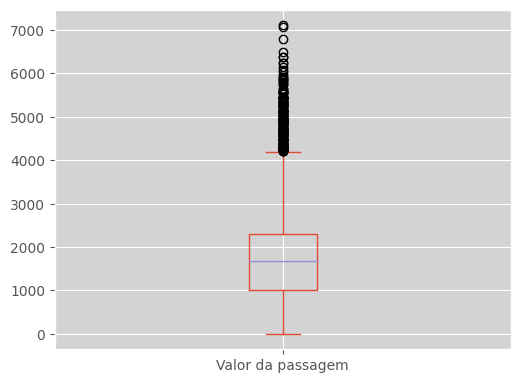

In [86]:
#É apresentado um bloxspot considerando apenas órgãos com valores médios acima do valor médio do conjunto
df_passagens_2[(df_passagens_2["Relacao_media"] == "Acima da Media")].plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (20,15))
plt.show()

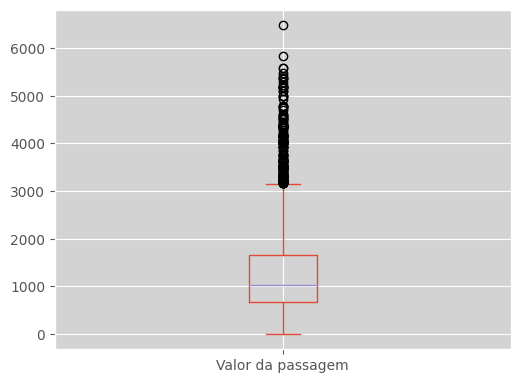

In [87]:
#É apresentado um bloxspot considerando apenas órgãos com valores médios abaixo do valor médio do conjunto
df_passagens_2[(df_passagens_2["Relacao_media"] == "Abaixo da Media")].plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (20,15))
plt.show()

Podemos verificar a seguir que as classes Abaixo da Media e Acima da Medida estão bem balanceadas, não necessitando, portanto, de tratamento especial para criação das bases de treinamento e validação

In [91]:
# distribuição das classes
df_passagens_2.groupby('Relacao_media').size()

Relacao_media
Abaixo da Media    7580
Acima da Media     7450
dtype: int64

# 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

**4.1. Tratamento de Missings e Limpeza**

Sabemos que o datset Diabetes não tem missings aparentes, mas valores "0" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [92]:
# verificando nulls no dataset
df_passagens_2.isnull().sum()

Identificador do processo de viagem      0
Número da Proposta (PCDP)                0
Meio de transporte                       0
País - Origem ida                        0
UF - Origem ida                          0
Cidade - Origem ida                      0
País - Destino ida                       0
UF - Destino ida                         0
Cidade - Destino ida                     0
País - Origem volta                      0
UF - Origem volta                        0
Cidade - Origem volta                    0
Pais - Destino volta                     0
UF - Destino volta                       0
Cidade - Destino volta                   0
Valor da passagem                        0
Data da emissão/compra                 103
Hora da emissão/compra                   0
Nome do órgão superior                   1
Nome do órgao pagador                    1
Relacao_media                            0
dtype: int64

In [94]:
#Podemos observar que apenas as colunas Data da emissão/compra, Hora da emissão/compra, Nome do órgão superior e Nome do órgao pagador
#possuem valores nulos. As colunas Data da emissão/compra e Hora da emissão/compra não são utilizadas nesse estudo. Por outro lado,
#Nome do órgão superior e Nome do órgao pagador são utilizados mas apresentando apenas uma linha com valor nulo. Considerando que
#estamos trabalhando com um universo de 15.030 linhas, a existência de apenas uma linha com valor nulo não afetará o resultado do processamento.
#Portanto não serão necessários tratamentos específico para valores nulos no dataset.

**4.2. Separação em conjunto de treino e conjunto de teste**